In [1]:
from fastai.vision.all import *

In [2]:
# foodPath = untar_data(URLs.FOOD)

In [9]:
food_path = untar_data(URLs.FOOD)

# Exploration

In [19]:
# get_image_files(food_path)
get_files(food_path)

(#101017) [Path('C:/Users/Gordon/.fastai/data/food-101/classes.txt'),Path('C:/Users/Gordon/.fastai/data/food-101/labels.txt'),Path('C:/Users/Gordon/.fastai/data/food-101/test.json'),Path('C:/Users/Gordon/.fastai/data/food-101/test.txt'),Path('C:/Users/Gordon/.fastai/data/food-101/train.json'),Path('C:/Users/Gordon/.fastai/data/food-101/train.txt'),Path('C:/Users/Gordon/.fastai/data/food-101/h5/food_c101_n1000_r384x384x3.h5'),Path('C:/Users/Gordon/.fastai/data/food-101/h5/food_c101_n10099_r32x32x1.h5'),Path('C:/Users/Gordon/.fastai/data/food-101/h5/food_c101_n10099_r32x32x3.h5'),Path('C:/Users/Gordon/.fastai/data/food-101/h5/food_c101_n10099_r64x64x1.h5')...]

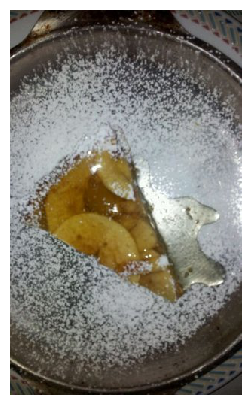

In [17]:
img = PILImage.create('C:/Users/Gordon/.fastai/data/food-101/images/apple_pie/1005649.jpg')
img.show()

In [18]:
len(get_image_files(food_path))

101000

In [20]:
pd.read_json('C:/Users/Gordon/.fastai/data/food-101/test.json')

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,churros/904526,hot_and_sour_soup/963551,samosa/917040,sashimi/889209,pork_chop/92293,spring_rolls/949343,panna_cotta/97960,beef_tartare/926143,greek_salad/949442,foie_gras/953456,...,chicken_quesadilla/921154,pho/964800,prime_rib/940800,cheesecake/970606,ice_cream/880755,omelette/955537,grilled_cheese_sandwich/942123,lobster_roll_sandwich/91688,nachos/962352,oysters/967284
246,churros/937430,hot_and_sour_soup/968546,samosa/929017,sashimi/893381,pork_chop/929555,spring_rolls/950371,panna_cotta/980326,beef_tartare/948352,greek_salad/961722,foie_gras/961263,...,chicken_quesadilla/924555,pho/965012,prime_rib/941938,cheesecake/972877,ice_cream/891533,omelette/97045,grilled_cheese_sandwich/942187,lobster_roll_sandwich/931310,nachos/98976,oysters/967288
247,churros/938480,hot_and_sour_soup/982582,samosa/937665,sashimi/938288,pork_chop/934946,spring_rolls/951951,panna_cotta/981405,beef_tartare/956509,greek_salad/968471,foie_gras/982330,...,chicken_quesadilla/9290,pho/982022,prime_rib/956130,cheesecake/996516,ice_cream/923525,omelette/978714,grilled_cheese_sandwich/975531,lobster_roll_sandwich/946365,nachos/99050,oysters/978125
248,churros/95272,hot_and_sour_soup/984258,samosa/960937,sashimi/981801,pork_chop/942955,spring_rolls/990689,panna_cotta/98261,beef_tartare/976175,greek_salad/995103,foie_gras/98353,...,chicken_quesadilla/94597,pho/990037,prime_rib/958647,cheesecake/996918,ice_cream/995145,omelette/979117,grilled_cheese_sandwich/977481,lobster_roll_sandwich/962425,nachos/99088,oysters/978925


# Data Preparation

In [26]:
# Pick the classification labels
labelA = 'sushi'
labelB = 'sashimi'

In [31]:
# Remove irrelevant images and rename relevant images with a label prefix
for img in get_image_files(food_path):
    if labelA in str(img):
        img.rename(f"{img.parent}/{labelA}_{img.name}")
    elif labelB in str(img):
        img.rename(f"{img.parent}/{labelB}_{img.name}")
    else: os.remove(img)

len(get_image_files(food_path))

2000

# Model Training

In [34]:
# Function to get label of image
def GetLabel(fileName):
    return fileName.split('_')[0]

GetLabel("sashimi_100113.jpg") 

'sashimi'

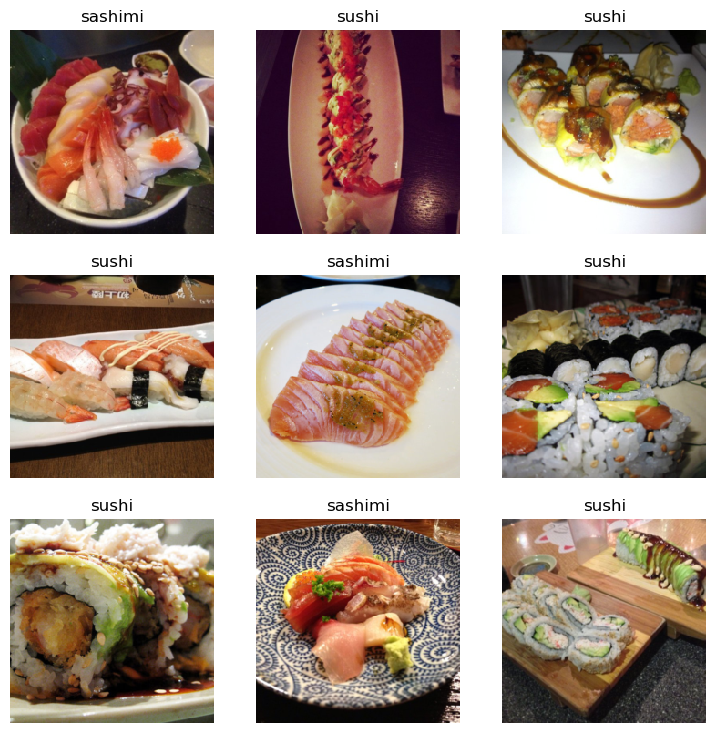

In [35]:
# Generate a DataLoaders object (using a mix of training and validation data)
# Path specifies location of downloaded and extracted data
# get_image_files collects all file names from the specified location
# This uses an 80–20 split for the dataset.
# This extracts labels from file names using the GetLabel function.
# This resizes all images to the same size, i.e. 224 pixels.
# show_batch generates an output window displaying a grid of training images with assigned labels.

dls = ImageDataLoaders.from_name_func(
    food_path, get_image_files(food_path), valid_pct=0.2, seed=1997, 
    label_func=GetLabel, item_tfms=Resize(224))

dls.valid.show_batch()

In [36]:
# cnn_learner is used to train our model. It includes our image set, the pre-trained model resnet34 
# for the purposes of transfer learning, and the error rate metric to minimise.
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)

# fine_tune trains the pre-trained model on the specific dataset for 10 epochs, to adapt it to our current task.
learn.fine_tune(epochs=10)

E:\anaconda3\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
E:\anaconda3\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
E:\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth"

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.755013,0.463188,0.120000,02:27


epoch,train_loss,valid_loss,error_rate,time
0,0.397776,0.392462,0.130000,03:07
1,0.270344,0.357625,0.115000,03:09
2,0.163762,0.499651,0.112500,03:13
3,0.117181,0.511280,0.125000,03:10
4,0.094674,0.534918,0.107500,02:54
5,0.068056,0.577535,0.115000,02:52
6,0.051039,0.497958,0.095000,02:54
7,0.035954,0.473767,0.092500,02:54
8,0.024697,0.465143,0.087500,02:52
9,0.017487,0.466180,0.085000,02:52


# Model Verification

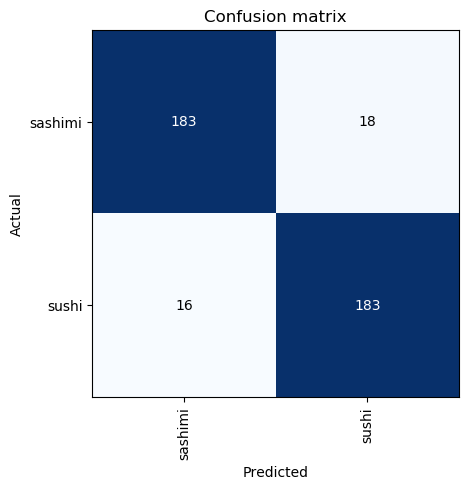

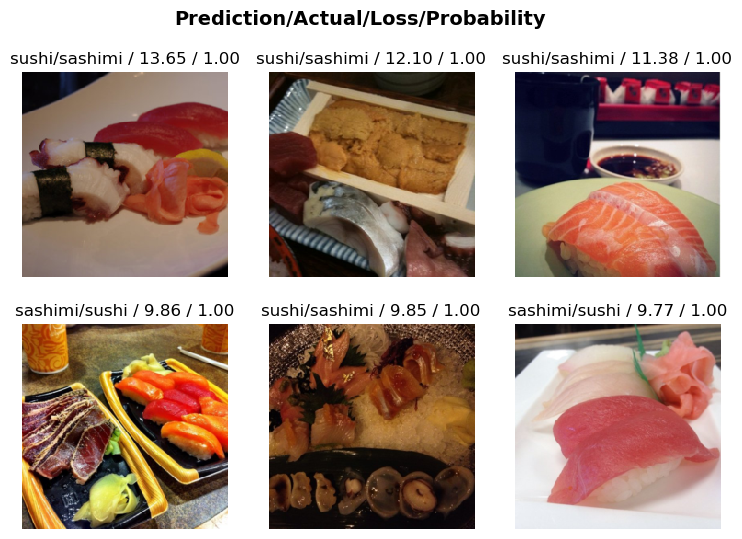

In [37]:
# Visualise performance in a confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Show examples for some incorrectly classified images
interp.plot_top_losses(6)

Interstingly, some of the sashimi-labelled images appear to be mislabelled as they contain rice (and therefore should be sushi instead). This implies our model is working (mostly) as intended and the results here are not 100% indicative of the model's performance. 

Let's test on a few additional images from an internal and external source to see how the model performs.

In [71]:
def MakePredictionOnData(imagePath, learnerModel):
    # Load and preprocess image from the dataset
    dataset_image = PILImage.create(imagePath)
    preprocessed_dataset_image = dls.valid.after_batch(dataset_image)

    # Make prediction using our trained model
    dataset_prediction, dataset_label, dataset_probs = learnerModel.predict(preprocessed_dataset_image)
    print(dataset_prediction, dataset_probs[dataset_label])
    dataset_image.show()

sashimi tensor(1.)


sushi tensor(1.0000)


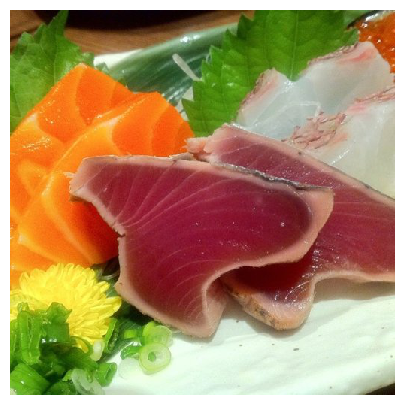

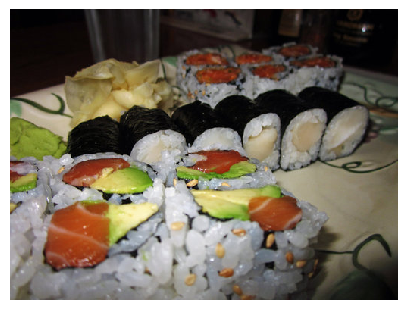

In [74]:
# Test learner model on images from dataset
MakePredictionOnData(dls.valid_ds.items[55], learn)
MakePredictionOnData(dls.valid_ds.items[5], learn)

sashimi tensor(1.)


sushi tensor(1.0000)


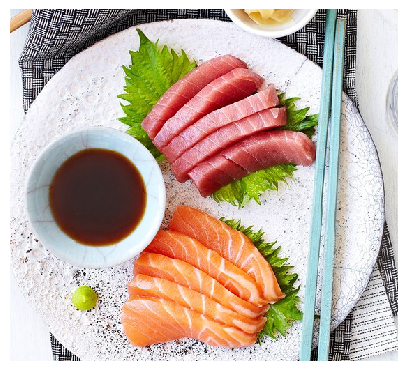

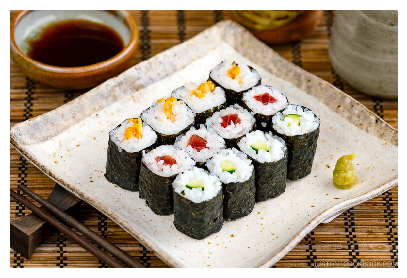

In [76]:
# Test learner model on images from external source (downloaded from Google)
MakePredictionOnData("test_data/sashimi_test1.jpg", learn)
MakePredictionOnData("test_data/sushi_test1.jpg", learn)

# Model Deployment

In [80]:
# Export model as a .pkl file
learn.export("model.pkl")

In [90]:
# Import model
model_path = get_files(food_path, '.pkl')[0]
learnImported = load_learner(model_path)

sashimi tensor(0.9986)


sushi tensor(0.9981)


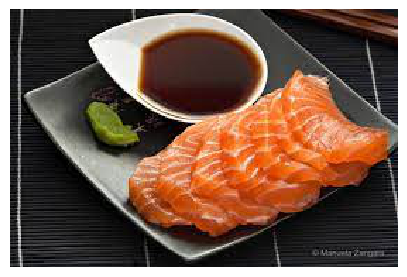

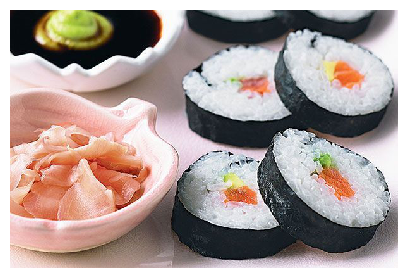

In [93]:
# Test imported model using externally sourced images
MakePredictionOnData("test_data/sashimi_test2.jpg", learnImported)
MakePredictionOnData("test_data/sushi_test2.jpg", learnImported)